<h1><center>In the name of Allah</center></h1>

Import Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:
uber_df = pd.read_csv('Data/uber.csv')

In [3]:
uber_df.head(10)

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,27:09.0,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,04:00.0,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,52:00.0,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,32:00.0,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,06:00.0,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [4]:
uber_df.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


<ul>
  <li><b>key</b>: a unique identifier for each trip</li>
  <li><b>fare_amount</b>: the cost of each trip in usd <b>(target)</b></li>
  <li><b>pickup_datetime</b>: date and time when the meter was engaged</li>
  <li><b>pickup_datetime</b>: date and time when the meter was engaged</li>
  <li><b>passenger_count</b>: the number of passengers in the vehicle (driver entered value)</li>
  <li><b>pickup_longitude</b>: the longitude where the meter was engaged</li>
  <li><b>pickup_latitude</b>: the latitude where the meter was engaged</li>
  <li><b>dropoff_longitude</b>: the longitude where the meter was disengaged</li>
  <li><b>dropoff_latitude</b>: the latitude where the meter was disengaged</li>
</ul>

In [5]:
uber_df = uber_df.dropna()
uber_df = uber_df.drop_duplicates()

In [6]:
uber_df = uber_df[np.all(uber_df.loc[:,'pickup_longitude':'dropoff_latitude'] != 0,axis=1)].reset_index(drop=True)

In [7]:
uber_df['pickup_datetime'] = pd.to_datetime(uber_df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S %Z')

In [8]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196031 entries, 0 to 196030
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   index              196031 non-null  int64              
 1   key                196031 non-null  object             
 2   fare_amount        196031 non-null  float64            
 3   pickup_datetime    196031 non-null  datetime64[ns, UTC]
 4   pickup_longitude   196031 non-null  float64            
 5   pickup_latitude    196031 non-null  float64            
 6   dropoff_longitude  196031 non-null  float64            
 7   dropoff_latitude   196031 non-null  float64            
 8   passenger_count    196031 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.5+ MB


In [9]:
from sklearn.metrics.pairwise import haversine_distances

pickup_rad = np.radians(uber_df[['pickup_latitude', 'pickup_longitude']])
dropoff_rad = np.radians(uber_df[['dropoff_latitude', 'dropoff_longitude']])
distance = np.zeros(uber_df.shape[0])
for i in np.arange(uber_df.shape[0]):
    distance[i] = haversine_distances([pickup_rad.iloc[i,:],dropoff_rad.iloc[i,:]]) [0,1]

distance_in_km = distance * 6371.009

In [10]:
uber_df['haver_dist'] = distance_in_km

In [11]:
uber_df['man_dist'] = np.abs(uber_df['pickup_longitude'] - uber_df['dropoff_longitude']) +\
      np.abs(uber_df['pickup_latitude'] - uber_df['dropoff_latitude'])

In [12]:
uber_df

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haver_dist,man_dist
0,24238194,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325,0.015442
1,27835199,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593,0.022455
2,44984355,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384,0.074355
3,25894730,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686,0.023313
4,17610152,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456,0.065221
...,...,...,...,...,...,...,...,...,...,...,...
196026,42598914,49:00.0,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,0.001447
196027,16382965,09:00.0,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875053,0.024733
196028,27804658,42:00.0,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.850337,0.190959
196029,20259894,56:25.0,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,3.539720,0.043945


In [13]:
uber_df['pickup_year'] = uber_df['pickup_datetime'].dt.year
uber_df['pickup_month'] = uber_df['pickup_datetime'].dt.month
uber_df['pickup_day'] = uber_df['pickup_datetime'].dt.day
uber_df['pickup_hr'] = uber_df['pickup_datetime'].dt.hour
uber_df['pickup_min'] = uber_df['pickup_datetime'].dt.minute

In [14]:
uber_df['pickup_time'] = (uber_df['pickup_hr']*60 + uber_df['pickup_min']) / 60

time = (hr*60 + min) / 60

In [15]:
uber_df.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haver_dist,man_dist,pickup_year,pickup_month,pickup_day,pickup_hr,pickup_min,pickup_time
count,1.960310e+05,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000,196031.000000
mean,2.771193e+07,11.343009,-73.930055,40.705591,-73.917108,40.688590,1.685228,4.773461,0.118236,2011.739541,6.282272,15.705271,13.490744,29.528019,13.982877
std,1.600944e+07,9.799572,5.449368,5.426844,8.518210,3.994266,1.388150,94.110088,10.650143,1.858878,3.439841,8.688299,6.514438,17.337942,6.521194
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.383107e+07,6.000000,-73.992268,40.736396,-73.991592,40.735265,1.000000,1.255521,0.016404,2010.000000,3.000000,8.000000,9.000000,14.000000,9.400000
50%,2.774864e+07,8.500000,-73.982101,40.753287,-73.980521,40.753726,1.000000,2.156637,0.028153,2012.000000,6.000000,16.000000,14.000000,30.000000,14.633333
75%,4.154481e+07,12.500000,-73.968313,40.767542,-73.965316,40.768326,2.000000,3.910226,0.050822,2013.000000,9.000000,23.000000,19.000000,45.000000,19.500000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,16409.262316,3270.155787,2015.000000,12.000000,31.000000,23.000000,59.000000,23.983333


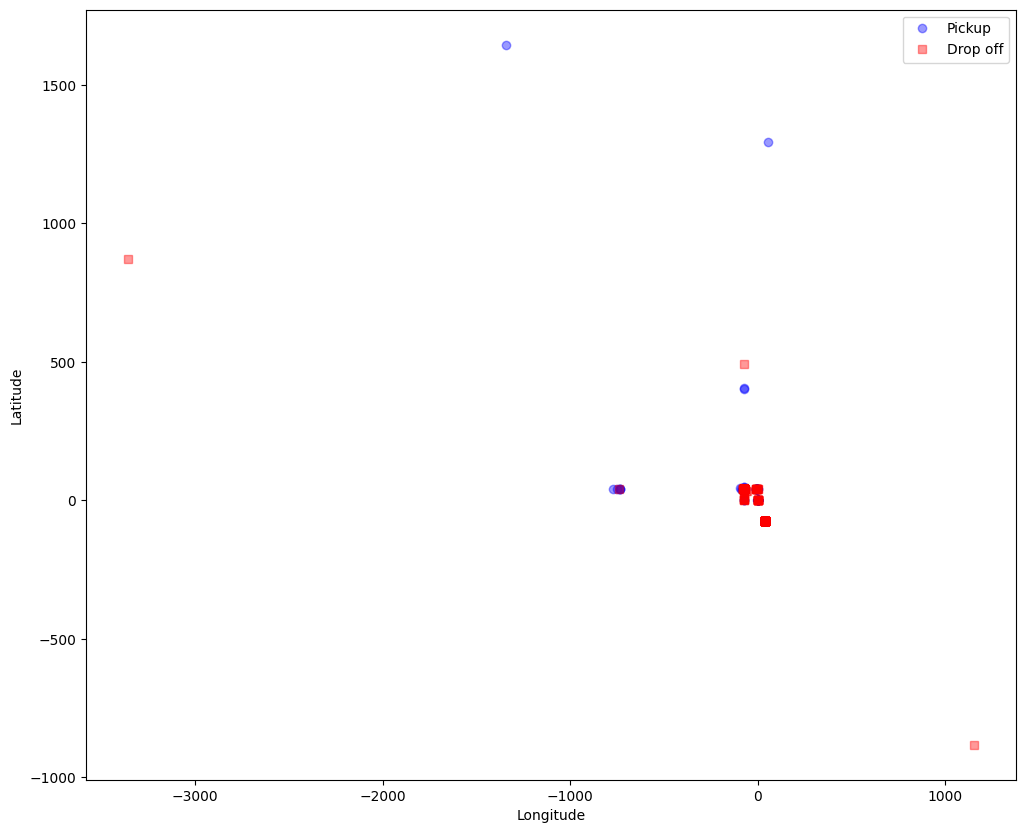

In [16]:
plt.figure(figsize=(12,10))
plt.plot(uber_df['pickup_longitude'],uber_df['pickup_latitude'],'bo',label = 'Pickup',alpha=0.4)
plt.plot(uber_df['dropoff_longitude'],uber_df['dropoff_latitude'],'rs',label='Drop off',alpha=0.4)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude');

<Figure size 640x480 with 0 Axes>

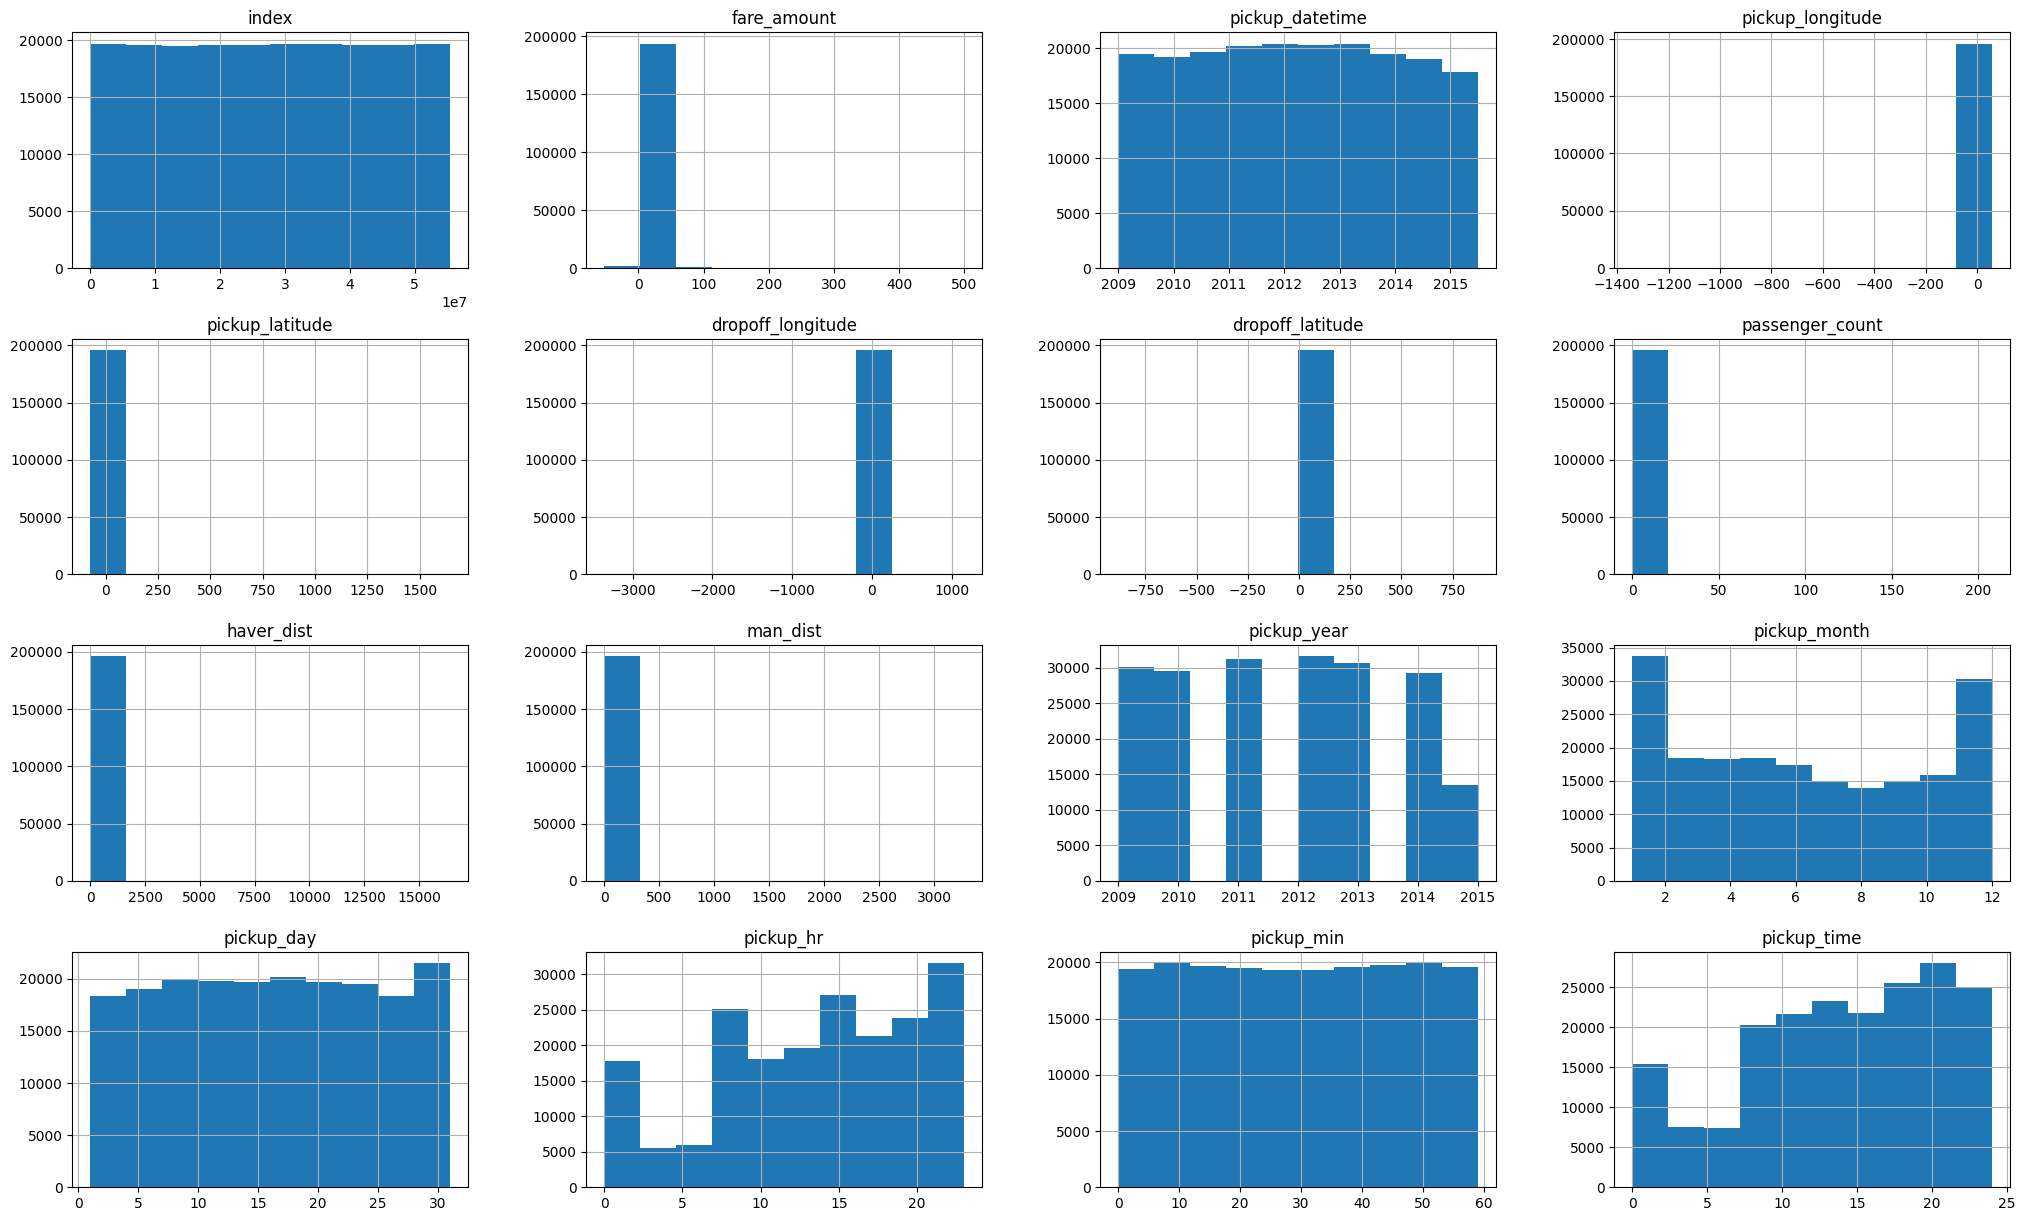

In [17]:
plt.figure()
uber_df.hist(figsize=(25,15));

In [18]:
uber_df = uber_df[['fare_amount','haver_dist','pickup_time','pickup_datetime']]


uber_df = uber_df[(uber_df['haver_dist'] <= 20) & (uber_df['haver_dist'] >= 0.05)]
uber_df = uber_df[uber_df['fare_amount'] >= 1]
uber_df = uber_df[uber_df['fare_amount'] <= 100]

In [19]:
uber_df.describe()

,fare_amount,haver_dist,pickup_time
count,190606.000000,190606.000000,190606.000000
mean,10.783571,3.139977,13.984507
std,8.097859,2.976335,6.530378
min,2.500000,0.050318,0.000000
25%,6.000000,1.281083,9.400000
50%,8.500000,2.162359,14.633333
75%,12.500000,3.846683,19.533333
max,100.000000,19.998337,23.983333


In [20]:
uber_df['log_fare_amount'] = np.log(uber_df['fare_amount'])
uber_df['log_haver_dist'] = np.log(uber_df['haver_dist'])

<Figure size 640x480 with 0 Axes>

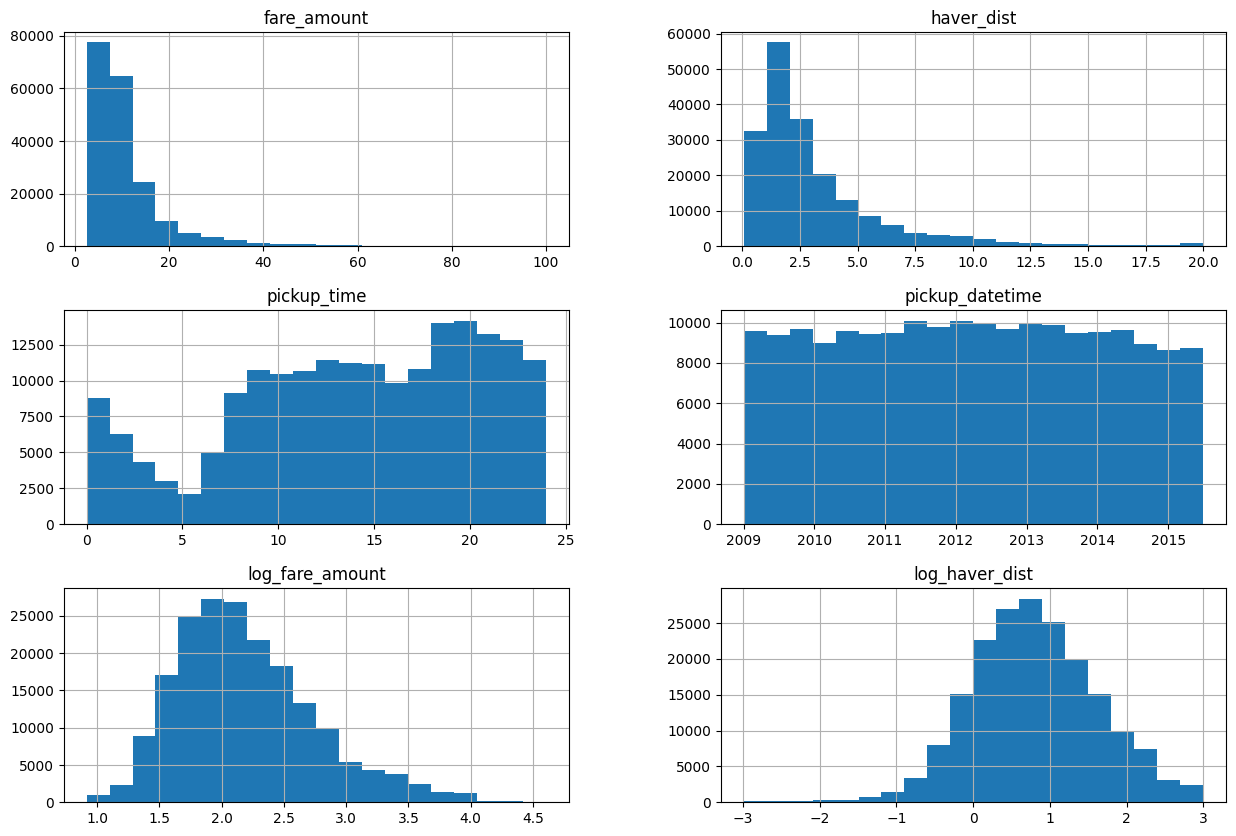

In [21]:
plt.figure()
uber_df.hist(figsize=(15,10), bins=20);

In [22]:
uber_df = uber_df.drop(['fare_amount','haver_dist'],axis=1)
uber_df

,pickup_time,pickup_datetime,log_fare_amount,log_haver_dist
0,19.866667,2015-05-07 19:52:06+00:00,2.014903,0.520771
1,20.066667,2009-07-17 20:04:56+00:00,2.041220,0.899183
2,21.750000,2009-08-24 21:45:00+00:00,2.557227,1.616688
3,8.366667,2009-06-26 08:22:21+00:00,1.667707,0.507833
4,17.783333,2014-08-28 17:47:00+00:00,2.772589,1.498608
...,...,...,...,...
196026,10.816667,2012-10-28 10:49:00+00:00,1.098612,-2.187380
196027,1.150000,2014-03-14 01:09:00+00:00,2.014903,0.628637
196028,0.700000,2009-06-29 00:42:00+00:00,3.430756,2.553370
196029,14.933333,2015-05-20 14:56:25+00:00,2.674149,1.264048


In [23]:
uber_df['is_weekend'] = uber_df['pickup_datetime'].dt.day_of_week > 4
uber_df = uber_df.drop(['pickup_datetime'],axis= 1)
uber_df = uber_df.reset_index(drop=True)


In [24]:
uber_df['is_weekend'] = uber_df['is_weekend'].astype('int')

In [25]:
uber_df

,pickup_time,log_fare_amount,log_haver_dist,is_weekend
0,19.866667,2.014903,0.520771,0
1,20.066667,2.041220,0.899183,0
2,21.750000,2.557227,1.616688,0
3,8.366667,1.667707,0.507833,0
4,17.783333,2.772589,1.498608,0
...,...,...,...,...
190601,10.816667,1.098612,-2.187380,1
190602,1.150000,2.014903,0.628637,0
190603,0.700000,3.430756,2.553370,0
190604,14.933333,2.674149,1.264048,0


In [26]:
uber_df['is_weekend'].value_counts()

is_weekend
0    136531
1     54075
Name: count, dtype: int64

<Axes: >

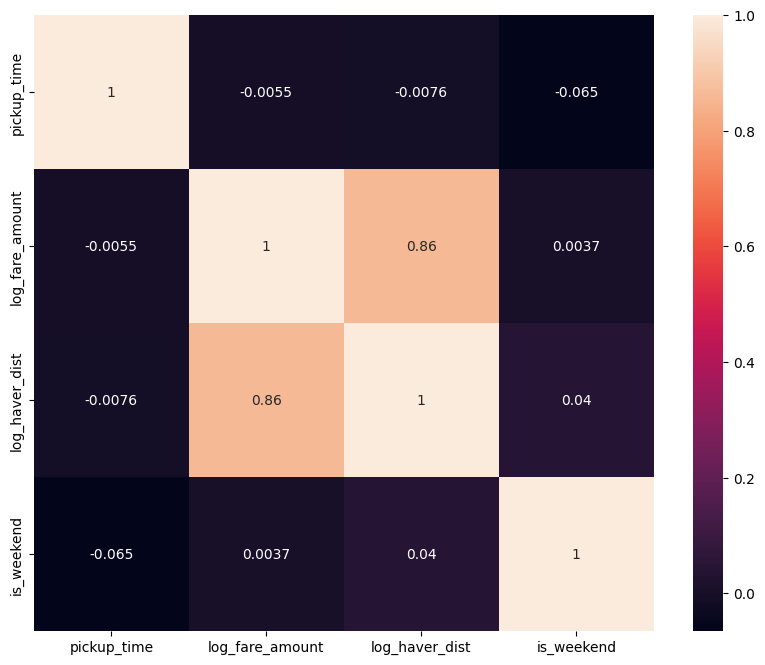

In [132]:
plt.figure(figsize=(10,8))
sns.heatmap(uber_df.corr(method='spearman'),annot=True)

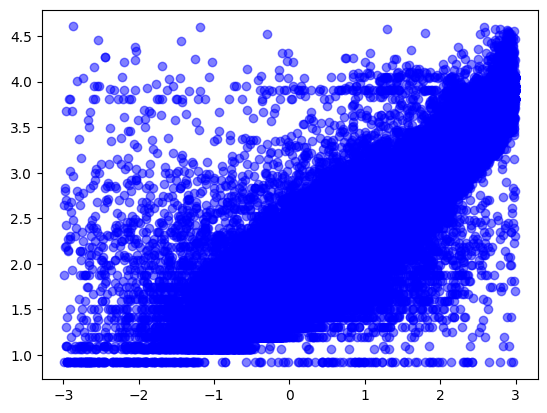

In [28]:
plt.figure()
plt.plot(uber_df['log_haver_dist'],uber_df['log_fare_amount'],'bo',alpha=0.5)

Modeling

In [114]:
X = uber_df.drop('log_fare_amount', axis=1)
y = uber_df['log_fare_amount']

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, shuffle=True, random_state=42, stratify=uber_df['is_weekend'])

In [116]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [117]:
from sklearn.preprocessing import MinMaxScaler

normal_scaler = MinMaxScaler()
X_train_n = normal_scaler.fit_transform(X_train.drop(['is_weekend'], axis=1))

In [118]:
X_train_n = pd.DataFrame(X_train_n, columns=X_train.drop(['is_weekend'], axis=1).columns)
X_train_n = pd.concat([X_train_n, X_train['is_weekend']], axis=1)

In [119]:
X_train = X_train_n

In [120]:
X_test_n = normal_scaler.transform(X_test.drop(['is_weekend'], axis=1))
X_test_n = pd.DataFrame(X_test_n, columns=X_test.drop(['is_weekend'], axis=1).columns)
X_test_n = pd.concat([X_test_n, X_test['is_weekend']], axis=1)
X_test = X_test_n

DT

In [121]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


dt = DecisionTreeRegressor(random_state=42)
params = {'max_depth': [5, 7, 12, 15, 25],
          'min_samples_split': [2, 3, 5, 7,],
          'min_samples_leaf': [5, 7, 15, 25]}
grid = GridSearchCV(estimator=dt, param_grid=params, cv=5,
                    scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 7, 12, 15, 25],
                         'min_samples_leaf': [5, 7, 15, 25],
                         'min_samples_split': [2, 3, 5, 7]},
             scoring='neg_mean_squared_error')

In [123]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 25, 'min_samples_split': 2}

In [124]:
grid.best_score_

-0.06909306762373042

In [125]:
best_dt_mdl = grid.best_estimator_

In [126]:
yhat_train = best_dt_mdl.predict(X_train)

In [127]:
from sklearn.metrics import mean_squared_error,r2_score

mse_train = mean_squared_error(np.exp(y_train),np.exp(yhat_train))
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(np.exp(y_train),np.exp(yhat_train))
print(f'{mse_train = }, {rmse_train = }, {r2_train=}')

mse_train = 14.574702004843196, rmse_train = 3.8176828056876593, r2_train=0.777686197677282


In [128]:
yhat_test = best_dt_mdl.predict(X_test)

In [129]:
mse_test = mean_squared_error(np.exp(y_test),np.exp(yhat_test))
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(np.exp(y_test),np.exp(yhat_test))
print(f'{mse_test = }, {rmse_test = }, {r2_test=}')

mse_test = 15.726704367887585, rmse_test = 3.965690906751002, r2_test=0.7611934649230518


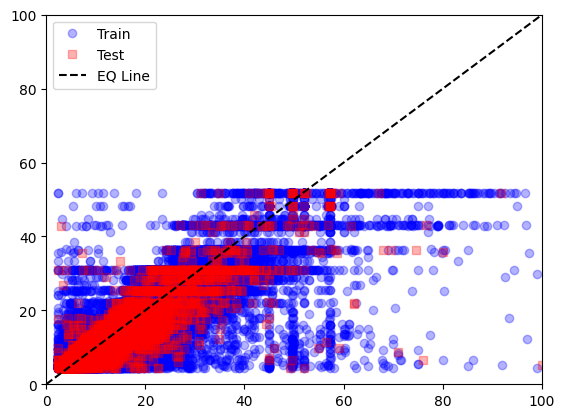

In [135]:
plt.figure()
plt.plot(np.exp(y_train), np.exp(yhat_train), 'bo', alpha=0.3,label='Train')
plt.plot(np.exp(y_test), np.exp(yhat_test), 'rs', alpha=0.3,label='Test')
plt.plot([0,100],[0,100],'k--',label='EQ Line')
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.legend();

In [ ]:
plt.figure()

In [133]:
best_dt_mdl.feature_importances_

array([0.00972102, 0.98881816, 0.00146082])

In [134]:
best_dt_mdl.feature_names_in_

array(['pickup_time', 'log_haver_dist', 'is_weekend'], dtype=object)